# Gradient Boosting

---



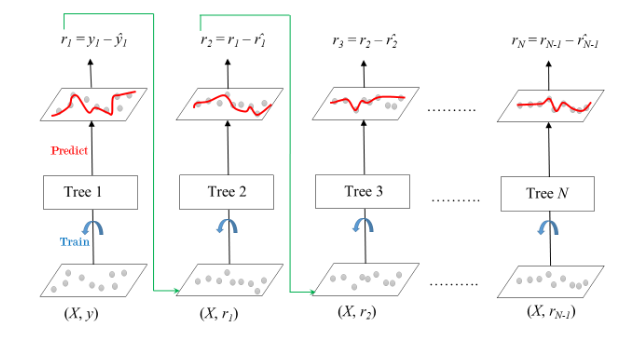

## Key Concepts

### 1. Loss Function

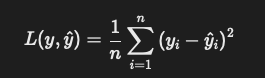

### 2. Update at Each Iteration

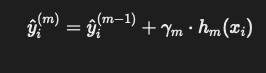

### 3. Loss After Update

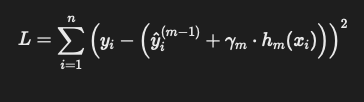

### 4. Gamma Calculation

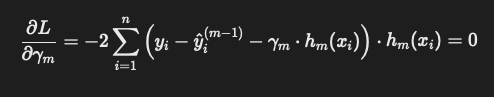

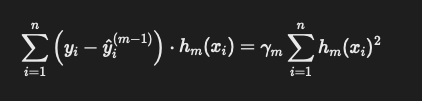

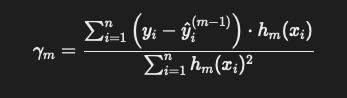

## Version 1 (from scratch)

### Example 1

In [57]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [58]:
# Load the Diabetes dataset
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [60]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [45]:

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:

# Gradient Boosting parameters
n_estimators = 100  # Number of boosting iterations
learning_rate = 0.1  # Step size for updating predictions
max_depth = 2  # Depth of each decision tree


In [47]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

class GradientBoostingFromScratch:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=2):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []  # List to store weak learners
        self.gammas = []  # List to store scaling factors for each tree
        self.initial_prediction = None

    def fit(self, X, y):
        # Step 1: Initialize with the mean of y (baseline prediction)
        self.initial_prediction = np.mean(y)
        y_pred = np.full(len(y), self.initial_prediction)

        # Iterate for the specified number of estimators
        for i in range(self.n_estimators):
            # Step 2: Compute the residuals (negative gradient of the loss function)
            residuals = y - y_pred

            # Step 3: Fit a decision tree to the residuals
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=42)
            tree.fit(X, residuals)

            # Step 4: Find the optimal gamma (scaling factor) for this tree
            gamma = self._compute_gamma(y, y_pred, tree.predict(X))
            self.gammas.append(gamma)

            # Step 5: Update predictions
            y_pred += self.learning_rate * gamma * tree.predict(X)

            # Store the tree
            self.trees.append(tree)

            # Print RMSE for the current iteration
            rmse = root_mean_squared_error(y, y_pred)
            print(f"Iteration {i+1}/{self.n_estimators}, RMSE: {rmse:.4f}")

    def _compute_gamma(self, y_true, y_pred, tree_output):
        # For Mean Squared Error, gamma is computed as:
        # gamma = Sum(residuals * tree_output) / Sum(tree_output^2)
        numerator = np.sum((y_true - y_pred) * tree_output)
        denominator = np.sum(tree_output ** 2)
        return numerator / denominator

    def predict(self, X):
        # Start with the initial prediction
        y_pred = np.full(len(X), self.initial_prediction)

        # Add contributions from all the weak learners
        for gamma, tree in zip(self.gammas, self.trees):
            y_pred += self.learning_rate * gamma * tree.predict(X)

        return y_pred




In [48]:
# Instantiate and train the Gradient Boosting model
gb = GradientBoostingFromScratch(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
gb.fit(X_train, y_train)

# Predict on the test set
predictions = gb.predict(X_test)

# Calculate final RMSE
final_rmse = root_mean_squared_error(y_test, predictions)
print(f"\nFinal Test RMSE: {final_rmse:.4f}")


Iteration 1/100, RMSE: 74.5655
Iteration 2/100, RMSE: 71.6526
Iteration 3/100, RMSE: 69.1005
Iteration 4/100, RMSE: 66.9322
Iteration 5/100, RMSE: 65.0450
Iteration 6/100, RMSE: 63.4399
Iteration 7/100, RMSE: 61.9047
Iteration 8/100, RMSE: 60.5300
Iteration 9/100, RMSE: 59.3467
Iteration 10/100, RMSE: 58.3746
Iteration 11/100, RMSE: 57.4582
Iteration 12/100, RMSE: 56.6117
Iteration 13/100, RMSE: 55.9105
Iteration 14/100, RMSE: 55.2415
Iteration 15/100, RMSE: 54.6414
Iteration 16/100, RMSE: 54.1346
Iteration 17/100, RMSE: 53.6281
Iteration 18/100, RMSE: 53.1091
Iteration 19/100, RMSE: 52.6965
Iteration 20/100, RMSE: 52.3355
Iteration 21/100, RMSE: 51.9306
Iteration 22/100, RMSE: 51.5777
Iteration 23/100, RMSE: 51.2775
Iteration 24/100, RMSE: 51.0070
Iteration 25/100, RMSE: 50.7324
Iteration 26/100, RMSE: 50.4135
Iteration 27/100, RMSE: 50.1730
Iteration 28/100, RMSE: 49.9216
Iteration 29/100, RMSE: 49.6782
Iteration 30/100, RMSE: 49.4554
Iteration 31/100, RMSE: 49.2396
Iteration 32/100,

### Example 2

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

In [50]:

# Generate a small synthetic dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

In [51]:
X_min = np.min(X)
X_max = np.max(X)

print(f"The range of values in X is: {X_min} to {X_max}")

y_min = np.min(y)
y_max = np.max(y)

print(f"The range of values in y is: {y_min} to {y_max}")

The range of values in X is: -2.6197451040897444 to 1.8522781845089378
The range of values in y is: -118.02745408901401 to 89.03314516693368


Round 1/12: Train RMSE = 37.3781, Test RMSE = 37.2550
Round 2/12: Train RMSE = 33.8705, Test RMSE = 33.7803
Round 3/12: Train RMSE = 30.7057, Test RMSE = 30.5469
Round 4/12: Train RMSE = 27.8881, Test RMSE = 27.7975
Round 5/12: Train RMSE = 25.3551, Test RMSE = 25.2291
Round 6/12: Train RMSE = 23.0959, Test RMSE = 22.9074
Round 7/12: Train RMSE = 21.0809, Test RMSE = 20.8781
Round 8/12: Train RMSE = 19.2894, Test RMSE = 19.1539
Round 9/12: Train RMSE = 17.6913, Test RMSE = 17.6223
Round 10/12: Train RMSE = 16.2842, Test RMSE = 16.2660
Round 11/12: Train RMSE = 15.0364, Test RMSE = 15.0824
Round 12/12: Train RMSE = 13.9273, Test RMSE = 14.0148


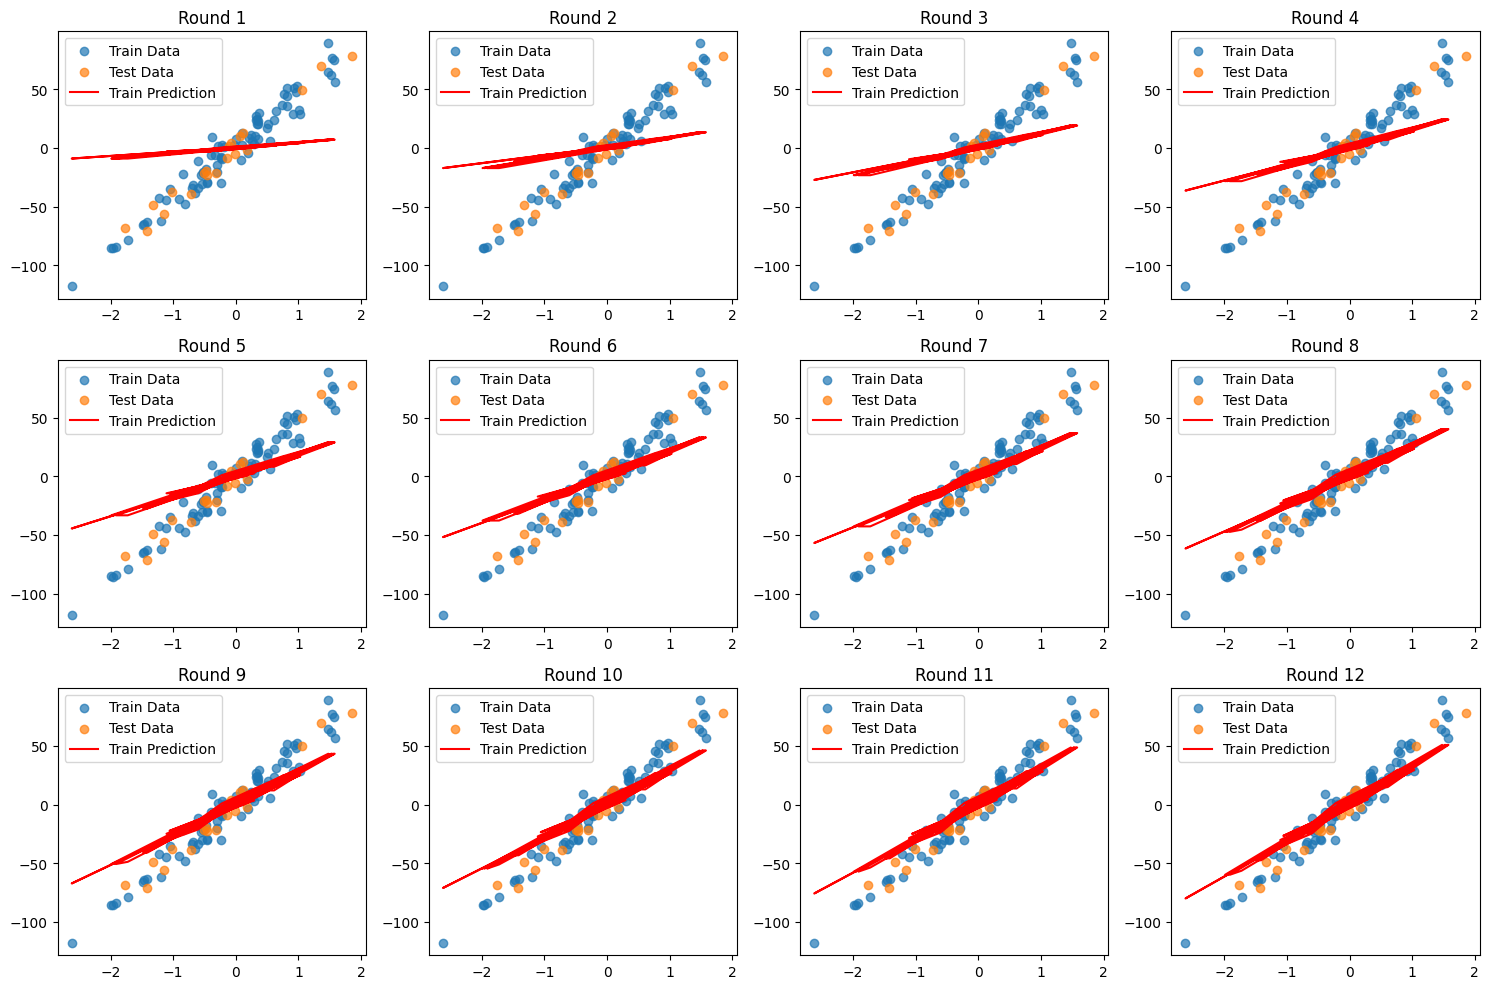

In [52]:
# Split the data into training and testing sets
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Gradient Boosting parameters
n_estimators = 12  # Number of boosting rounds
learning_rate = 0.1  # Shrinkage parameter

def gradient_boosting_with_plots(X_train, y_train, X_test, y_test, n_estimators, learning_rate):
    train_preds = np.zeros(len(y_train))
    test_preds = np.zeros(len(y_test))

    plt.figure(figsize=(15, 10))

    for i in range(n_estimators):
        # Compute residuals
        residuals = y_train - train_preds

        # Fit a decision tree to residuals
        tree = DecisionTreeRegressor(max_depth=3, random_state=42)
        tree.fit(X_train, residuals)

        # Update predictions
        train_preds += learning_rate * tree.predict(X_train)
        test_preds += learning_rate * tree.predict(X_test)

        # Plot current model predictions
        plt.subplot(3, 4, i + 1)
        plt.scatter(X_train, y_train, label="Train Data", alpha=0.7)
        plt.scatter(X_test, y_test, label="Test Data", alpha=0.7)
        plt.plot(X_train, train_preds, color="red", label="Train Prediction")
        plt.title(f"Round {i+1}")
        plt.legend()

        # Calculate RMSE for train and test
        train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
        test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
        print(f"Round {i+1}/{n_estimators}: Train RMSE = {train_rmse:.4f}, Test RMSE = {test_rmse:.4f}")

    plt.tight_layout()
    plt.show()

# Run Gradient Boosting with visualization
gradient_boosting_with_plots(X_train, y_train, X_test, y_test, n_estimators, learning_rate)

## Version 2 (using library)

In [53]:
# Import the necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes
from sklearn.model_selection import GridSearchCV


In [54]:


# Setting SEED for reproducibility
SEED = 42

# Importing the dataset
X, y = load_diabetes(return_X_y=True)

# Splitting dataset
train_X, test_X, train_y, test_y = train_test_split(X, y,
													test_size = 0.2,
													random_state = SEED)

# Instantiate Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
								learning_rate=0.1,
								n_estimators=300,
								max_depth = 1,
								random_state = SEED,
								max_features = 5)

# Fit to training set
gbr.fit(train_X, train_y)

# Predict on test set
pred_y = gbr.predict(test_X)

# test set RMSE
test_rmse = mean_squared_error(test_y, pred_y) ** (1 / 2)

# Print rmse
print('Root mean Square error: {:.2f}'.format(test_rmse))


Root mean Square error: 53.23


### hyperparameter tuning

In [55]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Setting SEED for reproducibility
SEED = 42

# Importing the dataset
X, y = load_diabetes(return_X_y=True)

# Splitting dataset
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=SEED)

# Define the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=SEED)

# Define the grid of hyperparameters to search
param_grid = {

    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [1, 2, 3],
    'max_features': [2, 5]

}

# Define GridSearchCV
grid_search = GridSearchCV(estimator=gbr,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=kf,
                           verbose=1,
                           n_jobs=-1)

# Perform grid search on training data
grid_search.fit(train_X, train_y)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Hyperparameters:")
print(best_params)

# Evaluate on the test set
pred_y = best_estimator.predict(test_X)
test_rmse = np.sqrt(mean_squared_error(test_y, pred_y))
# Print RMSE
print('Root Mean Square Error on Test Set: {:.2f}'.format(test_rmse))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters:
{'learning_rate': 0.2, 'max_depth': 1, 'max_features': 2, 'n_estimators': 100}
Root Mean Square Error on Test Set: 52.79


## References

[Gradient Boosting in ML](https://www.geeksforgeeks.org/ml-gradient-boosting/)

[Gradient Boosting : Data Science's Silver Bullet](https://youtu.be/en2bmeB4QUo?si=QnV5N6P2GD_83DXB)